BER for User 1 (Weak User): 0.0080
BER for User 2 (Strong User): 0.0300


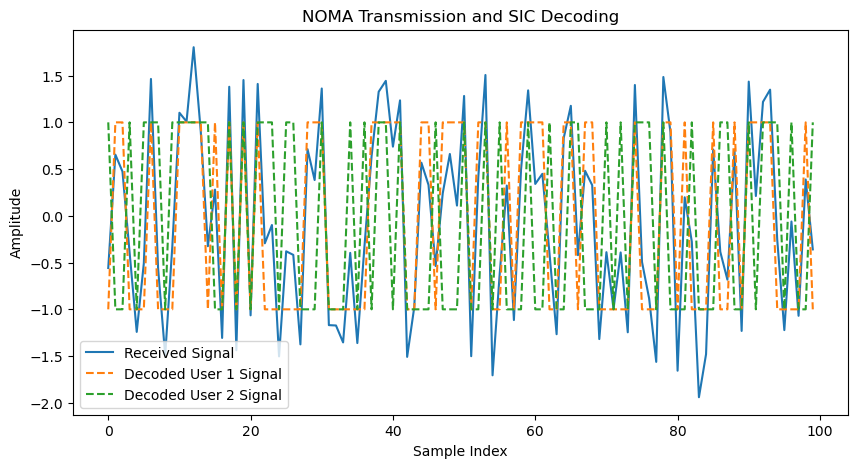

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def noma_transmission(s1, s2, p1, p2):
    """
    Simulates a NOMA transmission.
    s1: Signal of User 1 (weak user, high power)
    s2: Signal of User 2 (strong user, low power)
    p1: Power allocated to User 1
    p2: Power allocated to User 2
    """
    return np.sqrt(p1) * s1 + np.sqrt(p2) * s2

def add_noise(signal, noise_power):
    """ Adds AWGN noise to the signal."""
    noise = np.sqrt(noise_power / 2) * np.random.randn(*signal.shape)
    return signal + noise

def sic_receiver(received_signal, p1, p2, h1, h2):
    """
    Implements Successive Interference Cancellation (SIC) for NOMA.
    h1, h2: Channel gains for User 1 and User 2
    p1, p2: Power allocated to User 1 and User 2
    """
    # Step 1: Strong user decodes the weak user's signal first
    y2 = received_signal / h2  # Normalize by User 2's channel gain
    s1_est = np.sign(y2 / np.sqrt(p1))  # Decode User 1's signal
    
    # Step 2: Subtract estimated User 1 signal from received signal
    reconstructed_s1 = h2 * np.sqrt(p1) * s1_est
    remaining_signal = y2 - reconstructed_s1
    
    # Step 3: Decode User 2's own signal
    s2_est = np.sign(remaining_signal / np.sqrt(p2))
    
    return s1_est, s2_est

# Parameters
num_samples = 1000
p1, p2 = 0.8, 0.2  # Power allocation (p1 > p2)
h1, h2 = 0.5, 1.0  # Channel gains (User 1 has worse channel)
noise_power = 0.1

# Generate random binary signals (-1,1) for both users
s1 = np.random.choice([-1, 1], num_samples)
s2 = np.random.choice([-1, 1], num_samples)

# Transmit signal using NOMA
transmitted_signal = noma_transmission(s1, s2, p1, p2)

# Add noise
received_signal = add_noise(transmitted_signal, noise_power)

# Apply SIC at User 2
s1_decoded, s2_decoded = sic_receiver(received_signal, p1, p2, h1, h2)

# Evaluate Bit Error Rate (BER)
ber_s1 = np.mean(s1 != s1_decoded)
ber_s2 = np.mean(s2 != s2_decoded)

print(f"BER for User 1 (Weak User): {ber_s1:.4f}")
print(f"BER for User 2 (Strong User): {ber_s2:.4f}")

# Plot received signals
plt.figure(figsize=(10, 5))
plt.plot(received_signal[:100], label='Received Signal')
plt.plot(s1_decoded[:100], '--', label='Decoded User 1 Signal')
plt.plot(s2_decoded[:100], '--', label='Decoded User 2 Signal')
plt.legend()
plt.title("NOMA Transmission and SIC Decoding")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.show()


Text(0, 0.5, 'Amplitude')

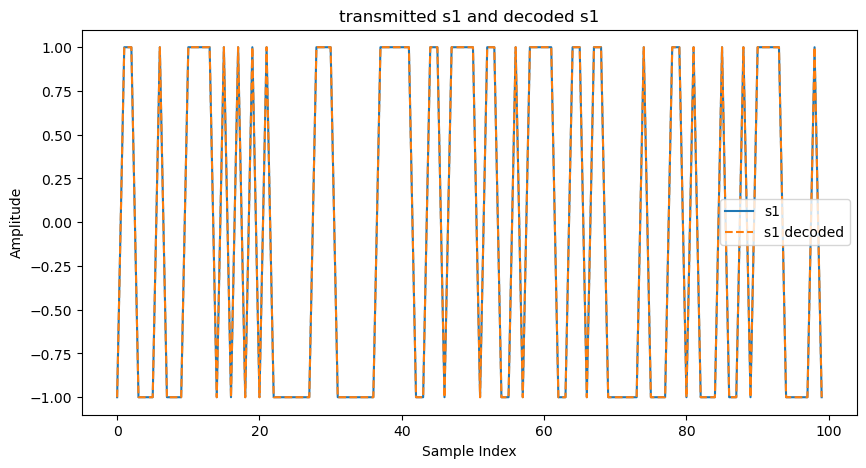

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(s1[:100], label='s1')
plt.plot(s1_decoded[:100],'--', label='s1 decoded')
plt.legend()
plt.title("transmitted s1 and decoded s1")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

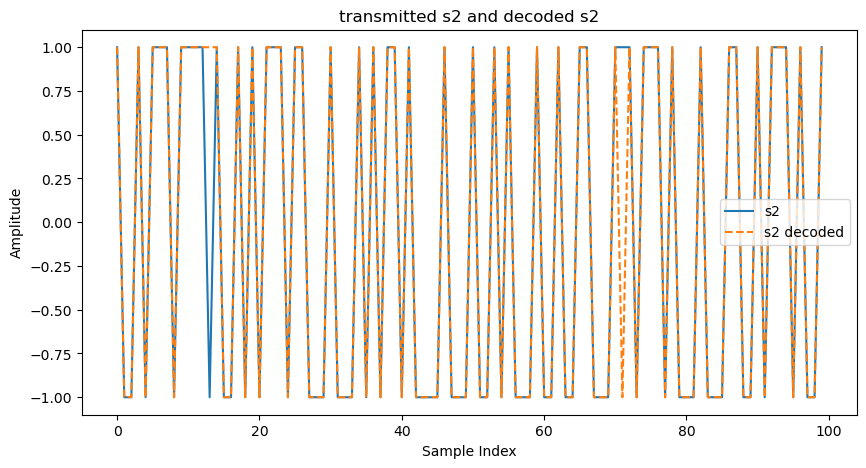

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(s2[:100], label='s2')
plt.plot(s2_decoded[:100],'--', label='s2 decoded')
plt.legend()
plt.title("transmitted s2 and decoded s2")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

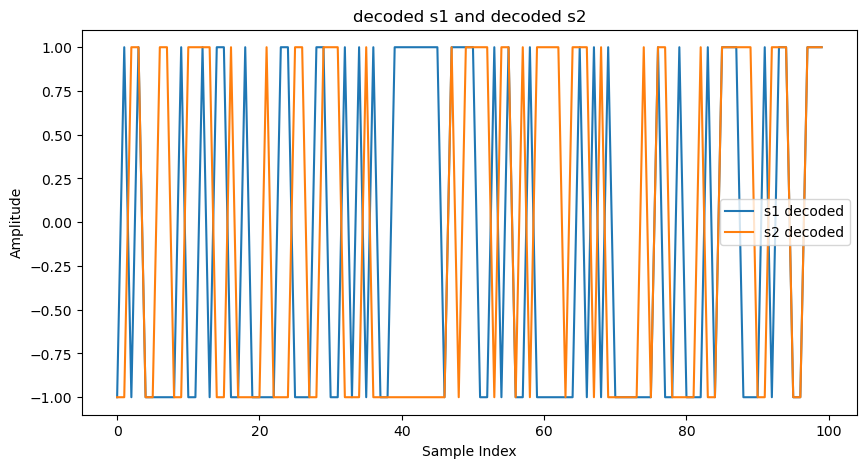

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(s1_decoded[:100], label='s1 decoded')
plt.plot(s2_decoded[:100], label='s2 decoded')
plt.legend()
plt.title("decoded s1 and decoded s2")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")